## Lead  Scoring Case Study

#### Step 1 : Importing and Mergirng Data 

In [431]:
#Supressing Warning 
import warnings 
warnings.filterwarnings('ignore')

In [432]:

# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [433]:
# Importing all datasets
Lead_scoring = pd.read_csv(r"C:\Users\hp\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
Lead_scoring.head()


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]


#### Step 2: Inspecting the Dataframe

In [434]:
# Let's check the dimensions of the dataframe
Lead_scoring.shape

(9240, 37)

In [435]:
 # let's look at the statistical aspects of the dataframe
Lead_scoring.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [436]:
# Let's see the type of each column
Lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [437]:
#Creating a copy of original dataset and we will be performing operations on the copy 

Lead_scoring_cp=Lead_scoring.copy()

#### Step 3: Data Preparation


In [438]:
# Adding up the missing values (column-wise)
Lead_scoring_cp.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [439]:
# Checking the percentage of missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [440]:
#Dropping Columns having missing values more than 40%

In [441]:
Lead_scoring_cp

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
0                     0.00  ...                        No          Select   
1                     2.50  ...                        No          Select   
2                     2.00  ...                        No  Potential Lead   
3                     1.00  ...                        No          Select   
4                     1.00  ...                        No          Select   
...                    ...  ...                       ...             ...   
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
0                 Select                   02.Medium   
1                 Select                   02.Medium   
2                 Mumbai                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
...                  ...                         ...   
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium        

In [442]:
drop_col = Lead_scoring_cp.columns[100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp)) > 40]
print(drop_col)

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [443]:
Lead_scoring_cp = Lead_scoring_cp.drop(drop_col, axis=1).copy()

In [444]:
Lead_scoring_cp.shape

(9240, 32)

In [445]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Treating Nulls Values 

In [446]:
Lead_scoring_cp['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [447]:
Lead_scoring_cp['Tags'].fillna('Other',inplace=True)

In [448]:
Lead_scoring_cp['Tags'].value_counts()

Other                                                3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [449]:


#After looking into the above , its fair to drop 'Tags' column as well , because we might not get any informations on the leads 

In [450]:
Lead_scoring_cp = Lead_scoring_cp.drop(['Tags'],1)

In [451]:
Lead_scoring_cp.shape

(9240, 31)

In [452]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 




##### Treating below column
Country                                          26.63



In [453]:
Lead_scoring_cp['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [454]:
#India is havng maximum values , we will treat missing with India 
#Also as per the anaysis , India the the country with maximus leads 

In [455]:
# Replacing missing values with most frequent value 'India' in categorical column 'Country':-

Lead_scoring_cp.Country.fillna('India',inplace=True)

In [456]:
#After 
Lead_scoring_cp['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [457]:
#After analysis , this data imputation is not useful , so dropping column this will be better 

In [458]:
Lead_scoring_cp = Lead_scoring_cp.drop(['Country'],1)

In [459]:
Lead_scoring_cp.shape

(9240, 30)

In [460]:
# Finding column names in which 'Select' level is available:-

cols=list(Lead_scoring_cp.columns)
for i in cols:
    if 'Select' in Lead_scoring_cp[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [461]:
# Imputing 'Select' with NaN' 

Lead_scoring_cp = Lead_scoring_cp.replace('Select', np.nan)

In [462]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [463]:
#we will drop lead profile and How did you hear about X Education as theya are having mamimum nulls and will not be helpful in our analysis 

In [464]:
Lead_scoring_cp = Lead_scoring_cp.drop(['How did you hear about X Education','Lead Profile'],1)

In [465]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [466]:

# Dropping the null values rows in the column 'TotalVisits'

Lead_scoring_cp = Lead_scoring_cp[~pd.isnull(Lead_scoring_cp['TotalVisits'])]

In [467]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.32
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                   36.30
What is your current occupation                  29.47
What matters most to you in choosing a course    29.68
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [468]:
# Dropping the null values rows in the column 'TotalVisits'

Lead_scoring_cp = Lead_scoring_cp[~pd.isnull(Lead_scoring_cp['Lead Source'])]

In [469]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                   36.17
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [470]:
#Specialization                                   36.17
#What is your current occupation                  29.57
#What matters most to you in choosing a course    29.78
#City                                             39.40

In [471]:
Lead_scoring_cp['City'].value_counts()

Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [472]:
#Mumbai has the highest leads 
#Looking at above data , City will not be a useful parameter when do the model building so dropping the City 


In [473]:
Lead_scoring_cp = Lead_scoring_cp.drop(['City'],1)

In [474]:
Lead_scoring_cp['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [475]:
# As maximus have selected "Better Career Prospects ", this column will not be helpful in our analysis and we can drop this

In [476]:
Lead_scoring_cp = Lead_scoring_cp.drop(['What matters most to you in choosing a course'],1)

In [477]:
Lead_scoring_cp['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

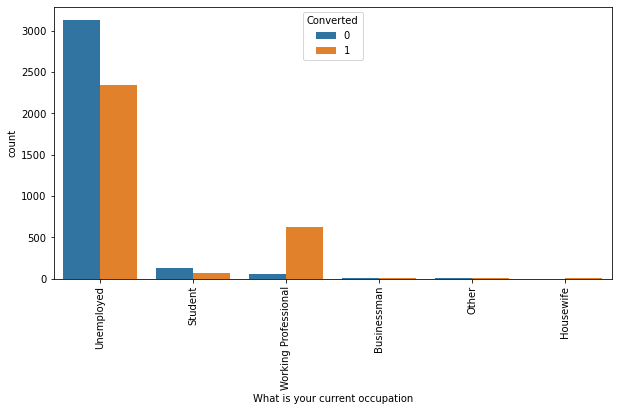

In [478]:
#Those who are unemployed are highest 
#plotting spread of Occupation

plt.figure(figsize=(10,5))
s1=sns.countplot(Lead_scoring_cp['What is your current occupation'], hue=Lead_scoring_cp.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [479]:

Lead_scoring_cp['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                156
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

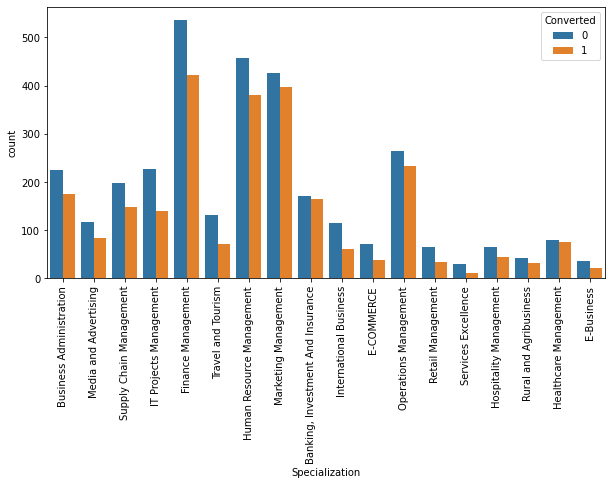

In [480]:
#Those who are unemployed are highest 
#plotting spread of Occupation

plt.figure(figsize=(10,5))
s1=sns.countplot(Lead_scoring_cp['Specialization'], hue=Lead_scoring_cp.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [481]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                0.00
Specialization                              36.17
What is your current occupation             29.57
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


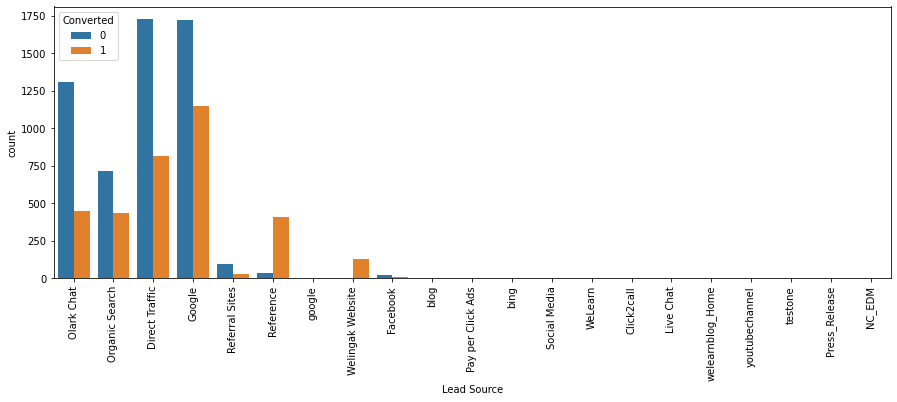

In [482]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_scoring_cp['Lead Source'], hue=Lead_scoring_cp.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


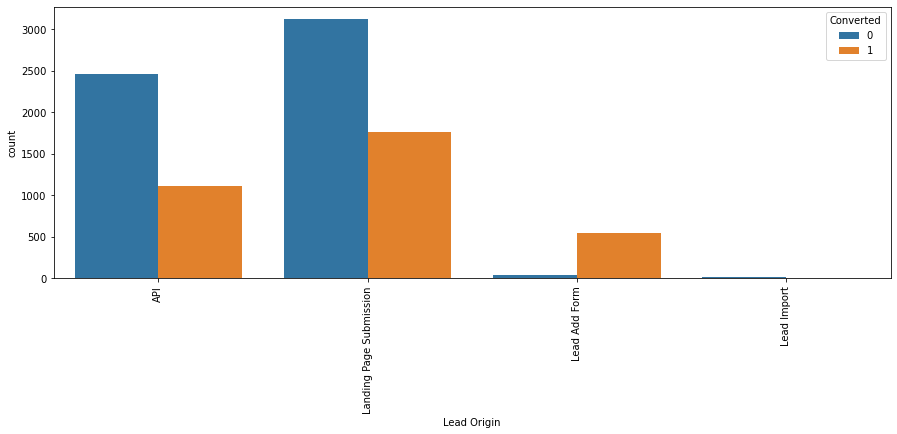

In [483]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_scoring_cp['Lead Origin'], hue=Lead_scoring_cp.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [484]:
# Imputing missing value with 'Others'

Lead_scoring_cp.Specialization.fillna('Others',inplace=True)

In [485]:

Lead_scoring_cp['Specialization'].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [486]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                0.00
Specialization                               0.00
What is your current occupation             29.57
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [487]:
# Imputing missing value with 'Others'

Lead_scoring_cp['What is your current occupation'].fillna('Others',inplace=True)

In [488]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [489]:
Lead_scoring_cp.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   
2                         1532                   2.0  ...                 No   
3                          305                   1.0  ...                 No   
4                         1428                   1.0  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 26 columns]

In [490]:
#As per the Data Prospect ID	Lead Number are some primary keys and not useful in anaylysis , so we can drop them 

Lead_scoring_cp = Lead_scoring_cp.drop(['Prospect ID','Lead Number'],1)

In [491]:
Lead_scoring_cp.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  ... X Education Forums  \
0  Page Visited on Website                   Others  ...                 No   
1             Email Opened                   Others  ...                 No   
2             Email Opened  Business Administration  ...                 No   
3              Unreachable    Media and Advertising  ...                 No   
4        Converted to Lead                   Others  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 24 columns]

In [492]:
#Checking data imbalance 

In [493]:
cols=list(Lead_scoring_cp.iloc[:,:])  # Creating list 'cols' of variables


for i in cols:
    print(i,'=====')
    print(Lead_scoring_cp[i].value_counts(), '\n')

Lead Origin =====
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64 

Lead Source =====
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

Do Not Email =====
No     8358
Yes     716
Name: Do Not Email, dtype: int64 

Do Not Call =====
No     9072
Yes       2
Name: Do Not Call, dtype: int64 

Converted =====
0    5639
1    3435
Name: Converted, dtype: int64 



##### 

From the above value_counts data we can see that columns 'Do Not Call','Search','Magazine','Newspaper Article',
'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' 'Last Notable Activity', will not contribute significatly to analysis ,
so better to drop these columns.

In [494]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [495]:




# Dropping variables which are having imbalanced data:-

Lead_scoring_cp.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Last Notable Activity','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace=True)

In [496]:
# Checking the percentage of remaining columns again for missing values
round(100*(Lead_scoring_cp.isnull().sum()/len(Lead_scoring_cp.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [497]:
Lead_scoring_cp.shape

(9074, 11)

In [498]:
Lead_scoring_cp.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [499]:
cols=list(Lead_scoring_cp.iloc[:,:])  # Creating list 'cols' of variables


for i in cols:
    print(i,'=====')
    print(Lead_scoring_cp[i].value_counts(), '\n')

Lead Origin =====
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64 

Lead Source =====
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

Do Not Email =====
No     8358
Yes     716
Name: Do Not Email, dtype: int64 

Converted =====
0    5639
1    3435
Name: Converted, dtype: int64 

TotalVisits =====
0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.

#### Converting some binary variables (Yes/No) to 0/1


In [500]:

# List of variables to map
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
 return x.map({'Yes': 1, "No": 0})
# Applying the function to the housing list
Lead_scoring_cp[varlist] = Lead_scoring_cp[varlist].apply(binary_map)

In [501]:
Lead_scoring_cp.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

In [502]:
Lead_scoring_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   int6

In [503]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead_scoring_cp[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True)

# Adding the results to the master dataframe
Lead_scoring_cp = pd.concat([Lead_scoring_cp, dummy1], axis=1)


In [504]:
Lead_scoring_cp.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation  ...  Specialization_International Business  \
0                      Unemployed  ...                                      0   
1                      Unemployed  ...                                      0   
2                         Student  ...                                      0   
3                      Unemployed  ...                                      0   
4                      Unemployed  ...                                      0   

   Specialization_Marketing Management  Specialization_Media and Advertising  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     1   
4                                    0                                     0   

   Specialization_Operations Management  Specialization_Others  \
0                                     0                      1   
1                                     0                      1   
2                                     0                      0   
3                                     0                      0   
4                                     0                      1   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 74 columns]

In [505]:
# We have created dummies for the below variables, so we can drop them
Lead_scoring_cp = Lead_scoring_cp.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization'], 1)

In [506]:
Lead_scoring_cp.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           1  ...   
3                        0                           1  ...   
4                        0                           0  ...   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Others  Specialization_Retail Management  \
0                      1                                 0   
1                      1                                 0   
2                      0                                 0   
3                      0                                 0   
4                      1                                 0   

   Specialization_Rural and Agribusiness  Specialization_Services Excellence  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   Specialization_Supply Chain Management  Specialization_Travel and Tourism  
0                                       0                                  0  
1                                       0                                  0  
2                                       0                                  0  
3                                       0                                  0  
4                                       0                                  0  

[5 rows x 69 columns]

In [507]:
Lead_scoring_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   A free copy of Mastering The Interview                9074 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 8   Lead Origin_Lead Import                               9074

In [508]:
#Now you can see that you have all variables as numeric.

In [509]:
# Importing required library to split data:-

from sklearn.model_selection import train_test_split

In [510]:
# Putting feature variable to X:-

X = Lead_scoring_cp.drop(['Converted'], axis=1)

# Displaying head :-

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   ...  Specialization_International Business  \
0  ...                                      0   
1  ...                                      0   
2  ...                                      0   
3  ...                                      0   
4  ...                                      0   

   Specialization_Marketing Management  Specialization_Media and Advertising  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     1   
4                                    0                                     0   

   Specialization_Operations Management  Specialization_Others  \
0                                     0                      1   
1                                     0                      1   
2                                     0                      0   
3                                     0                      0   
4                                     0                      1   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4            

In [511]:
# Putting response variable to y

y = Lead_scoring_cp['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [512]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [513]:
from sklearn.preprocessing import StandardScaler

In [514]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.284595                    -0.160255   
1012             1    -0.284595                    -0.540048   
9226             0    -0.671384                    -0.888650   
4750             0    -0.284595                     1.643304   
7987             0     0.295588                     2.017593   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3009             -0.179666                                       1   
1012             -0.179666                                       0   
9226             -1.132538                                       0   
4750             -0.179666                                       0   
7987              0.058552                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3009                        0                           1   
1012                        0                           1   
9226                        0                           0   
4750                        0                           1   
7987                        0                           1   

      Lead Source_Facebook  ...  Specialization_International Business  \
3009                     0  ...                                      0   
1012                     0  ...                                      0   
9226                     0  ...                                      0   
4750                     0  ...                                      0   
7987                     0  ...                                      0   

      Specialization_Marketing Management  \
3009                                    0   
1012                                    0   
9226                                    0   
4750                                    1   
7987                                    0   

      Specialization_Media and Advertising  \
3009                                     0   
1012                                     0   
9226                                     0   
4750                                     0   
7987                                     0   

      Specialization_Operations Management  Specialization_Others  \
3009                                     0                      0   
1012                                     0                      1   
9226                                     0                      1   
4750                                     0                      0   
7987                                     0                      0   

      Specialization_Retail Management  Specialization_Rural and Agribusiness  \
3009                                 0                                      0   
1012                                 0                                      0   
9226                                 0                                      0   
4750                                 0                                      0   
7987                                 0                                      0   

      Specialization_Services Excellence  \
3009                                   0   
1012                                   0   
9226                                   0   
4750                                   0   
7987                                   0   

      Specialization_Supply Chain Management  \
3009                                       0   
1012                                       0   
9226                                       0   
4750                                       0   


In [515]:
### Checking the lead_conv Rate
lead_conv = (sum(Lead_scoring_cp['Converted'])/len(Lead_scoring_cp['Converted'].index))*100
lead_conv

37.85541106458012

## Step 6: Looking at Correlations

In [516]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



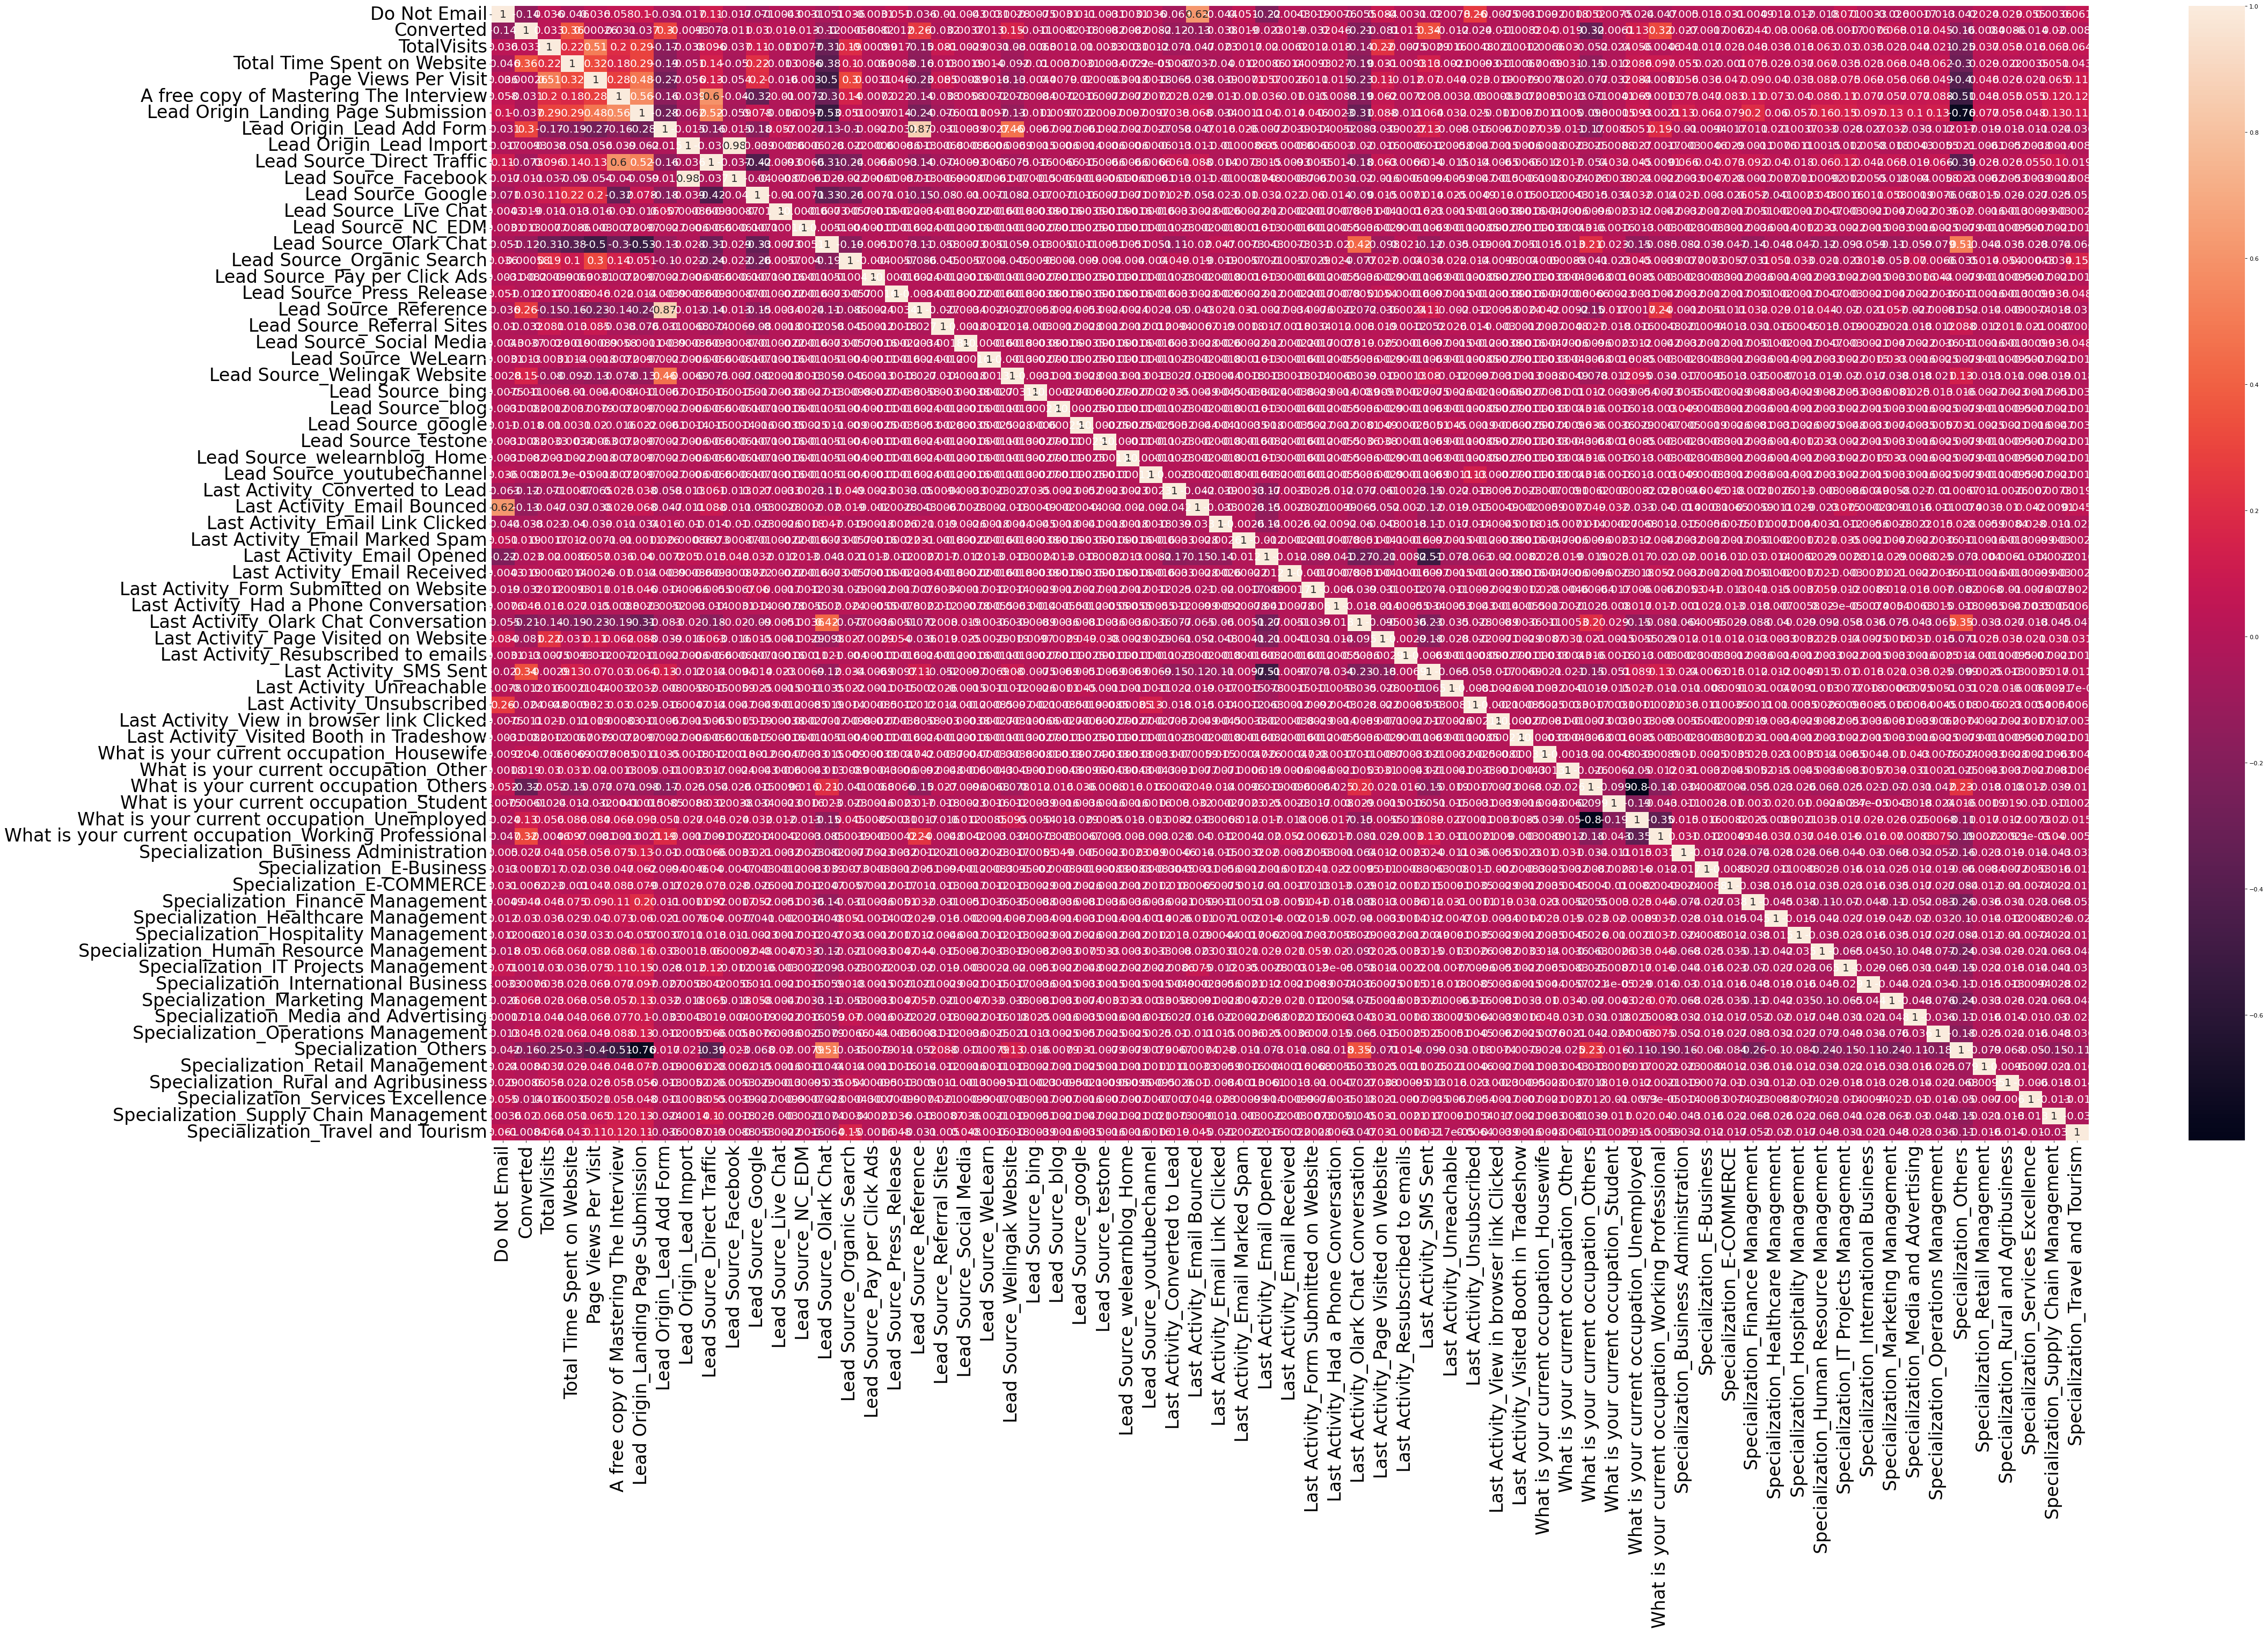

In [517]:
# Let's see the correlation matrix 
plt.figure(figsize =(60, 35),dpi=80)        # Size of the figure
sns.heatmap(Lead_scoring_cp.corr(),annot = True,annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

## Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [518]:
import statsmodels.api as sm

In [519]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.7
Date:                Tue, 23 Apr 2024   Deviance:                       4989.3
Time:                        00:25:07   Pearson chi2:                 6.27e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4216
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   27.1938   3.32e+04      0.001      0.999   -6.51e+04    6.52e+04
Do Not Email                                            -1.6396      0.222     -7.374      0.000      -2.075      -1.204
TotalVisits                                              0.2060      0.049      4.175      0.000       0.109       0.303
Total Time Spent on Website                              1.1269      0.042     26.821      0.000       1.045       1.209
Page Views Per Visit                                    -0.1519      0.053     -2.875      0.004      -0.255      -0.048
A free copy of Mastering The Interview                  -0.1736      0.111     -1.565      0.118      -0.391       0.044
Lead Origin_Landing Page Submission                     -0.7987      0.140     -5.719      0.000      -1.072      -0.525
Lead Origin_Lead Add Form                               -1.1269      1.534     -0.735      0.463      -4.134       1.880
Lead Origin_Lead Import                                 23.4677   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -2.7057      1.997     -1.355      0.175      -6.620       1.208
Lead Source_Facebook                                   -25.3821   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -2.4656      1.995     -1.236      0.216      -6.375       1.444
Lead Source_Live Chat                                   22.9504   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      22.1060   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.2979      1.988     -0.653      0.514      -5.194       2.599
Lead Source_Organic Search                              -2.5842      1.998     -1.294      0.196      -6.500       1.331
Lead Source_Pay per Click Ads                          -24.3369   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -22.6743   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.6356      1.289      1.269      0.204      -0.890       4.162
Lead Source_Referral Sites                              -2.7629      2.025     -1.365      0.172      -6.731       1.206
Lead Source_Social Media                                -0.9087      2.536     -0.358      0.720      -5.880       4.062
Lead Source_WeLearn                                  -4.365e-09   7.73e-06     -0.001      1.000   -1.51e-05    1.51e-05
Lead Source_Welingak Website                             4

## Step 8: Feature Selection Using RFE

In [520]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [521]:
from sklearn.feature_selection import RFE



In [522]:
rfe = RFE(estimator=logreg,n_features_to_select=15)             # running RFE with 15 variables as output



In [523]:
rfe = rfe.fit(X_train, y_train)

In [524]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False])

In [525]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 22),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_blog', False, 31),
 ('Lead Source_google', False, 20),
 

In [526]:
col = X_train.columns[rfe.support_]

In [527]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachab

### Assessing the model with StatsModels

In [528]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.9
Date:                Tue, 23 Apr 2024   Deviance:                       5091.8
Time:                        00:25:43   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1437      0.125     -1.153      0.249      -0.388       0.101
Do Not Email                                            -1.7971      0.185     -9.700      0.000      -2.160      -1.434
Total Time Spent on Website                              1.1116      0.041     27.132      0.000       1.031       1.192
Lead Origin_Landing Page Submission                     -1.0076      0.128     -7.859      0.000      -1.259      -0.756
Lead Origin_Lead Add Form                                3.0175      0.234     12.885      0.000       2.559       3.477
Lead Source_Olark Chat                                   1.2340      0.125      9.897      0.000       0.990       1.478
Lead Source_Welingak Website                             2.5089      0.756      3.317      0.001       1.027       3.991
Last Activity_Converted to Lead                         -1.2517      0.224     -5.585      0.000      -1.691      -0.812
Last Activity_Had a Phone Conversation                   2.6226      0.759      3.454      0.001       1.134       4.111
Last Activity_Olark Chat Conversation                   -1.3709      0.168     -8.147      0.000      -1.701      -1.041
Last Activity_SMS Sent                                   1.2727      0.076     16.712      0.000       1.123       1.422
Last Activity_Unsubscribed                               1.4019      0.473      2.965      0.003       0.475       2.329
What is your current occupation_Housewife               22.6448   1.54e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_Others                  -1.2178      0.089    -13.647      0.000      -1.393      -1.043
What is your current occupation_Working Professional     2.4015      0.192     12.506      0.000       2.025       2.778
Specialization_Others                                   -0.9283      0.126     -7.378      0.000      -1.175      -0.682
========================================================================================================================
"""

In [529]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.072613
1012    0.111509
9226    0.609925
4750    0.674876
7987    0.914058
1281    0.757779
2880    0.033937
4971    0.962505
7536    0.869327
1248    0.899057
dtype: float64

In [530]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07261348, 0.11150867, 0.60992514, 0.67487563, 0.91405788,
       0.75777875, 0.03393677, 0.96250473, 0.86932739, 0.89905662])

In [531]:
# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.072613         3009
1          0        0.111509         1012
2          0        0.609925         9226
3          1        0.674876         4750
4          1        0.914058         7987

In [532]:
from sklearn import metrics

In [533]:
# Let's create columns with different probability cutoffs :-
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.072613         3009    1    0    0    0    0    0    0   
1          0        0.111509         1012    1    1    0    0    0    0    0   
2          0        0.609925         9226    1    1    1    1    1    1    1   
3          1        0.674876         4750    1    1    1    1    1    1    1   
4          1        0.914058         7987    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [534]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.604944  0.986100  0.366197
0.2   0.2  0.766966  0.922322  0.669654
0.3   0.3  0.790427  0.878986  0.734955
0.4   0.4  0.811998  0.773917  0.835851
0.5   0.5  0.818139  0.710548  0.885531
0.6   0.6  0.809951  0.639820  0.916517
0.7   0.7  0.787435  0.532706  0.946991
0.8   0.8  0.760825  0.428863  0.968758
0.9   0.9  0.718470  0.289043  0.987452


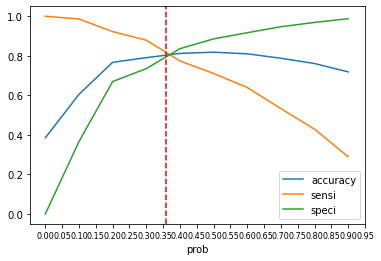

In [535]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

In [536]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [537]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [538]:
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.072613         3009                0
1          0        0.111509         1012                0
2          0        0.609925         9226                1
3          1        0.674876         4750                1
4          1        0.914058         7987                1

In [539]:
#Assignming lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [540]:
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.072613         3009                0           7
1          0        0.111509         1012                0          11
2          0        0.609925         9226                1          61
3          1        0.674876         4750                1          67
4          1        0.914058         7987                1          91

In [541]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3164  741]
 [ 487 1959]]


In [542]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8066446228940324


### Checking VIFs

In [543]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [544]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14                              Specialization_Others  2.29
4                              Lead Source_Olark Chat  2.07
2                 Lead Origin_Landing Page Submission  1.72
3                           Lead Origin_Lead Add Form  1.61
12             What is your current occupation_Others  1.61
9                              Last Activity_SMS Sent  1.59
8               Last Activity_Olark Chat Conversation  1.47
5                        Lead Source_Welingak Website  1.37
1                         Total Time Spent on Website  1.30
0                                        Do Not Email  1.19
13  What is your current occupation_Working Profes...  1.19
6                     Last Activity_Converted to Lead  1.10
10                         Last Activity_Unsubscribed  1.08
11          What is your current occupation_Housewife  1.01
7              Last Activity_Had a Phone Conversation  1.00

In [545]:
#Metrics beyond simply accuracy

In [546]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [547]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8008994276369583

In [548]:
# Let us calculate specificity
TN / float(TN+FP)

0.8102432778489117

In [549]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18975672215108835


In [550]:
# positive predictive value 
print (TP / float(TP+FP))

0.7255555555555555


In [551]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8666118871542043


### Step 9: Plotting the ROC Curve

#### An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [552]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [553]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


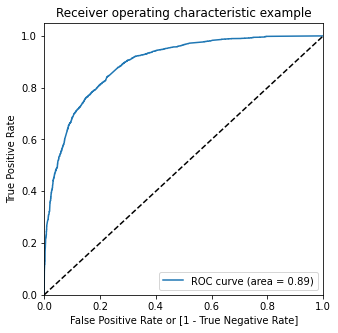

In [554]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [555]:
#the value is close to 1 so this is good 

### Precision and Recall

In [556]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3164,  741],
       [ 487, 1959]], dtype=int64)

In [557]:
##### Precision
TP / TP + FP

742.0

In [558]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7255555555555555

In [559]:
##Recall
TP / TP + FN

488.0

In [560]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8008994276369583

In [561]:
#Using sklearn utilities for the same

In [562]:
from sklearn.metrics import precision_score, recall_score

In [563]:
?precision_score

In [564]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7255555555555555

In [565]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8008994276369583

In [566]:
### Precision and recall tradeoff

In [567]:
from sklearn.metrics import precision_recall_curve

In [568]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: final_predicted, Length: 6351, dtype: int64)

In [569]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

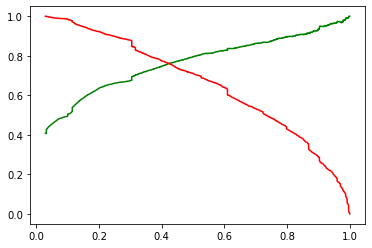

In [570]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [571]:
#the cut off from above is around 0.43

In [572]:
### Step 11: Making predictions on the test set

In [573]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [574]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
3271             0                    -0.600595   
1490             0                     1.887326   
7936             0                    -0.752879   
4216             0                    -0.888650   
3830             0                    -0.587751   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
3271                       0                             0   
1490                       0                             0   
7936                       0                             0   
4216                       0                             0   
3830                       0                             0   

      Last Activity_Converted to Lead  Last Activity_Had a Phone Conversation  \
3271                                0                                       0   
1490                                0                                       0   
7936                                0                                       0   
4216                                0                                       0   
3830                                0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                                      0                       0   
3830                                      0                       0   

      Last Activity_Unsubscribed  What is your current occupation_Housewife  \
3271                           0                                          0   
1490                           0                                          0   
7936                           0                                          0   
4216                           0                                          0   
3830                           0                                          0   

      What is your current occupation_Others  \
3271                                       1   
1490                                       0   
7936                                       1   
4216                                       0   
3830                                       1   

      What is your current occupation_Working Professional  \
3271                                                  0      
1490                                                  1      
7936                                                  0      
4216                                                  0      
3830                                                  0      

      Specialization_Others  
3271                      1  
1490                      0  
7936                      1  
4216                      0  
3830                      0

In [575]:
X_test_sm = sm.add_constant(X_test)

In [576]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [577]:
y_test_pred[:10]

3271    0.049386
1490    0.966044
7936    0.042019
4216    0.868304
3830    0.046423
1800    0.602870
6507    0.353611
4821    0.321230
4223    0.902955
4714    0.316295
dtype: float64

In [578]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [579]:
# Let's see the head
y_pred_1.head()

0
3271  0.049386
1490  0.966044
7936  0.042019
4216  0.868304
3830  0.046423

In [580]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [581]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [582]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [583]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [584]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.049386
1          1         1490  0.966044
2          0         7936  0.042019
3          1         4216  0.868304
4          0         3830  0.046423

In [585]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [586]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [587]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         3271          0        0.049386
1         1490          1        0.966044
2         7936          0        0.042019
3         4216          1        0.868304
4         3830          0        0.046423

In [588]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [589]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         3271          0        0.049386                0
1         1490          1        0.966044                1
2         7936          0        0.042019                0
3         4216          1        0.868304                1
4         3830          0        0.046423                0

In [590]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8079324274697025

In [591]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1408,  326],
       [ 197,  792]], dtype=int64)

In [592]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [593]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8008088978766431

In [594]:
# Let us calculate specificity
TN / float(TN+FP)

0.81199538638985

#### Observations  

In [595]:
# Accuracy of the model is 0.8079324274697025